<a href="https://colab.research.google.com/github/cartman12/DS-Unit-2-Classification-1/blob/master/module1-logistic-regression/Mohamad%20ali%20Nasser%20-%20logistic_regression_categorical_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install category_encoders

     |████████████████████████████████| 92kB 5.5MB/s 


In [0]:
import pandas as pd
train_features = pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P')
train_labels = pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f')
test_features = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')
train_features.shape, train_labels.shape, test_features.shape, sample_submission.shape

((59400, 40), (59400, 2), (14358, 40), (14358, 2))

In [0]:
train_features.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [0]:
train_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [0]:
train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [0]:
 
train_features['year'] = pd.to_datetime(train_features['date_recorded'], format = '%Y-%m-%d').year
test_features['year'] = pd.to_datetime(test_features['date_recorded'], format = '%Y-%m-%d').year

AttributeError: ignored

In [0]:
from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  train_size = 0.80, test_size = 0.20, 
                                                  stratify = y_train, random_state=42)

In [0]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [0]:
X_train_numeric = X_train.select_dtypes('number').drop('id', axis =1)
X_val_numeric = X_val.select_dtypes('number').drop('id', axis =1)



In [0]:
X_val_numeric.shape

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class = 'auto', max_iter = 2000)
model.fit(X_train_numeric, y_train)

In [0]:
y_pred = model.predict(X_val_numeric)


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_val, y_pred)

0.5606060606060606

In [0]:
def numeric_log(X_train, X_val, dropped_features):
  X_train_numeric = X_train.select_dtypes('number').drop(dropped_features, axis =1)
  X_val_numeric = X_val.select_dtypes('number').drop(dropped_features, axis =1)
  model = LogisticRegression(solver='liblinear', multi_class = 'auto', max_iter = 2000)
  model.fit(X_train_numeric, y_train)
  y_pred = model.predict(X_val_numeric)
  print (accuracy_score(y_val, y_pred))

In [0]:
train_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475,2011.921667
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547,0.958758
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,2002.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000,2011.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,2012.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,2013.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,2013.000000


In [0]:
numeric_log(X_train, X_val,['id','num_private','construction_year','district_code'])

0.55993265993266


In [0]:
X_train_numeric = X_train.select_dtypes('number').drop(['id','num_private','construction_year','district_code'], axis =1)
X_val_numeric = X_val.select_dtypes('number').drop(['id','num_private','construction_year','district_code'], axis =1)


In [0]:
numeric_features = X_train.select_dtypes('number').drop(['id','num_private','construction_year','district_code'], axis =1).T.index.tolist()

In [0]:
numeric_features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'region_code',
 'population',
 'year']

In [0]:
train_features

In [0]:
import category_encoders as ce

In [0]:
X_train['date_recorded'].isnull().sum()

In [0]:
X_train['date_recorded'].value_counts().sort_values()

In [0]:
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


In [0]:
categorical_features = X_train.describe(exclude='number').T.sort_values(by='unique').index[1:-8].tolist()
categorical_features

['public_meeting',
 'permit',
 'source_class',
 'management_group',
 'quantity_group',
 'quantity',
 'waterpoint_type_group',
 'quality_group',
 'payment_type',
 'source_type',
 'waterpoint_type',
 'extraction_type_class',
 'payment',
 'water_quality',
 'basin',
 'source',
 'scheme_management',
 'management',
 'extraction_type_group',
 'extraction_type',
 'region']

In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(X_train[categorical_features])
encoded.head(10)

,public_meeting_True,public_meeting_False,public_meeting_nan,permit_nan,permit_True,permit_False,source_class_groundwater,source_class_surface,source_class_unknown,management_group_user-group,management_group_commercial,management_group_parastatal,management_group_unknown,management_group_other,quantity_group_insufficient,quantity_group_enough,quantity_group_dry,quantity_group_seasonal,quantity_group_unknown,quantity_insufficient,quantity_enough,quantity_dry,quantity_seasonal,quantity_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other,waterpoint_type_group_improved spring,waterpoint_type_group_cattle trough,waterpoint_type_group_dam,quality_group_good,quality_group_salty,quality_group_fluoride,quality_group_milky,quality_group_unknown,quality_group_colored,payment_type_never pay,payment_type_monthly,payment_type_per bucket,payment_type_unknown,...,extraction_type_group_wind-powered,extraction_type_gravity,extraction_type_india mark ii,extraction_type_other,extraction_type_mono,extraction_type_swn 80,extraction_type_submersible,extraction_type_ksb,extraction_type_nira/tanira,extraction_type_other - swn 81,extraction_type_afridev,extraction_type_india mark iii,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_climax,extraction_type_cemo,extraction_type_walimi,extraction_type_windmill,extraction_type_other - mkulima/shinyanga,region_Mbeya,region_Iringa,region_Pwani,region_Kagera,region_Dodoma,region_Rukwa,region_Arusha,region_Mwanza,region_Mtwara,region_Tanga,region_Kilimanjaro,region_Manyara,region_Lindi,region_Kigoma,region_Morogoro,region_Shinyanga,region_Ruvuma,region_Tabora,region_Mara,region_Singida,region_Dar es Salaam
43360,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7263,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2486,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
313,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52726,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8558,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2559,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
54735,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25763,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44540,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# removed  'extraction_type_class',  'source', 'waterpoint_type_group', 'management', 'payment', 'waterpoint_type',
# removed numeric   'longitude','latitude', 'year'



In [0]:
numeric_features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'region_code',
 'population',
 'year']

In [0]:
from sklearn.preprocessing import StandardScaler



categorical_features = ['public_meeting', 'extraction_type_class',  'source', 'waterpoint_type_group', 'management', 'payment', 'waterpoint_type',
 'permit',
 'source_class',
 'management_group',
 'quantity_group',
 'quantity',
 'quality_group',
 'payment_type',
 'source_type',
 'water_quality',
 'basin',
 'scheme_management',
 'extraction_type_group',
 'extraction_type',
 'region','installer']
numeric_features = ['amount_tsh',
 'gps_height',
  'num_private',
 'population', 'region_code']
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='saga', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Validation Accuracy 0.7528619528619529


In [0]:
from sklearn.preprocessing import StandardScaler



categorical_features = ['public_meeting', 'extraction_type_class',  'source', 'waterpoint_type_group', 'management', 'payment', 'waterpoint_type',
 'permit',
 'source_class',
 'management_group',
 'quantity_group',
 'quantity',
 'quality_group',
 'payment_type',
 'source_type',
 'water_quality',
 'basin',
 'scheme_management',
 'extraction_type_group',
 'extraction_type',
 'region','installer']
numeric_features = ['amount_tsh',
 'gps_height',
  'num_private',
 'population', 'region_code']
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='saga', multi_class='auto', max_iter=200)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

In [0]:
from sklearn.preprocessing import StandardScaler



categorical_features = ['public_meeting', 'extraction_type_class',  'source', 'waterpoint_type_group', 'management', 'payment', 'waterpoint_type',
 'permit',
 'source_class',
 'management_group',
 'quantity_group',
 'quantity',
 'quality_group',
 'payment_type',
 'source_type',
 'water_quality',
 'basin',
 'scheme_management',
 'extraction_type_group',
 'extraction_type',
 'region','installer','ward']
numeric_features = ['amount_tsh',
 'gps_height',
  'num_private',
 'population', 'region_code']
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.7716329966329967


In [0]:
!head submission-01.csv

id,status_group
50785,non functional
51630,functional
17168,functional needs repair
45559,non functional
49871,functional
52449,functional
24806,non functional
28965,non functional
36301,non functional


In [241]:
from google.colab import files
files.download('submission-01.csv')

MessageError: ignored

In [0]:
model = LogisticRegression(solver='liblinear', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.7531144781144781


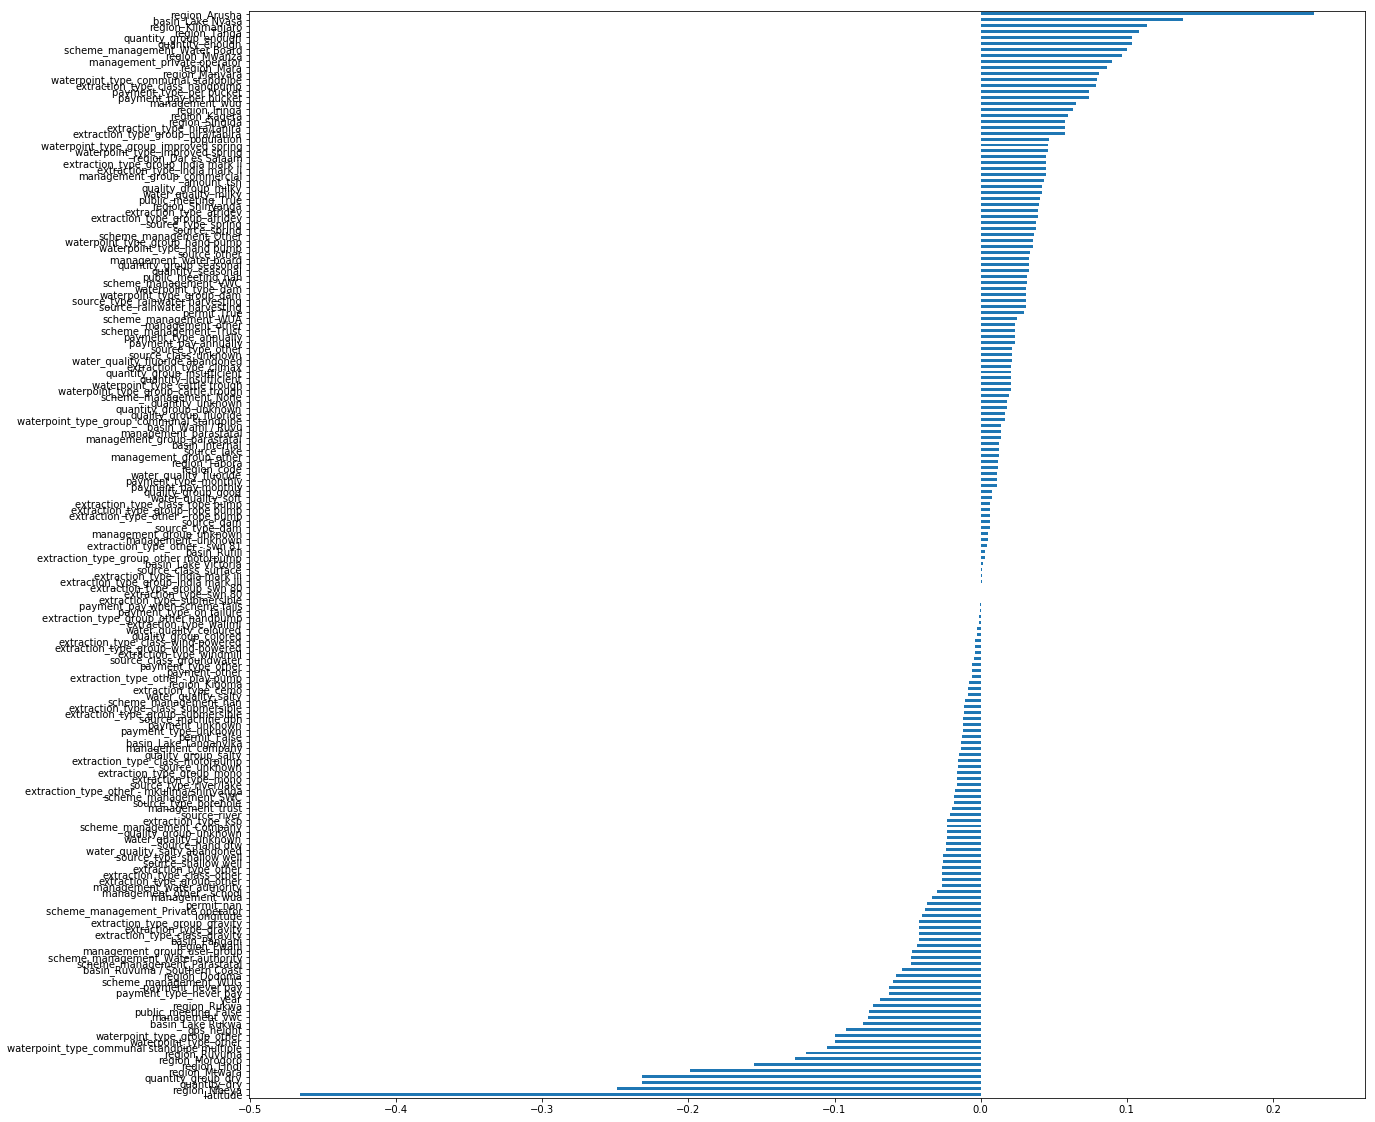

In [0]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
coefficients.sort_values().plot.barh();

In [0]:
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
import numpy as np

def best_subset(estimator, X, y, max_size=8, cv=5):


    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1) 
               for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = -np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size
            score = estimator.score(X.iloc[:, list(subset)], y)
            if score > best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)

    # compare best subsets of each size
    best_score = -np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        score = cross_val_score(estimator, X.iloc[:, list(subset)], y, cv=cv).mean()
        list_scores.append(score)
        if score > best_score:
            best_score, best_subset = score, subset

In [0]:
best_subset(model,X_train_numeric,y_train,max_size=4,cv=3)

In [0]:
def topcor(train_data, feature, label_data, label):
  list_of_corr = 